<a href="https://colab.research.google.com/github/JuanPoG/Tareas_Multimedia/blob/main/Proyecto_1/Proyecto_1_PobleteJuan_20521642_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Proyecto 1</h2></center>
<center><h3>Procesamiento digital de señales</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Juan Pablo Poblete</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [ ]:
from IPython.display import IFrame, display
filepath = "Proyecto_1_EIE401.pdf"
IFrame(filepath, width=700, height=400)

Debes usar el sitio https://gwosc.org/eventapi/html/GWTC/, donde encuentras todo el catálogo de observaciones con los datos en diferentes formatos. Debes seleccionar una detección para tu estudio y descargar los datos correspondientes (H5 o TXT), lo que posteriormente deberás tratar de manera digital como audio (serie de tiempo).
tip: Te recomiendo tomar la serie de tiempo corta (32 segundos) para facilitar el análisis, y asegurarte de tomar la tasa de muestreo más alta.
tip: Asegúrate de tomar un caso cuyo espectrograma de muestra, indique una señal clara y fuerte para facilitar tu trabajo, de otra forma es posible que no logres aislarla lo suficiente.


## 1. Carga de Datos


In [3]:
!git clone https://github.com/JuanPoG/Tareas_Multimedia.git

fatal: destination path 'Tareas_Multimedia' already exists and is not an empty directory.


In [4]:
import gzip
import shutil

ruta_archivo_comprimido = '/content/Tareas_Multimedia/Proyecto_1/H-H1_GWOSC_16KHZ_R1-1267963136-32.txt.gz'

ruta_archivo_descomprimido = '/content/Tareas_Multimedia/Proyecto_1/H-H1_GWOSC_16KHZ_R1-1267963136-32.txt'

with gzip.open(ruta_archivo_comprimido,'rb') as archivo_comprimido:
  with open(ruta_archivo_descomprimido,'wb') as archivo_descomprimido:
    shutil.copyfileobj(archivo_comprimido,archivo_descomprimido)

In [5]:
import numpy as np

ruta_archivo= '/content/Tareas_Multimedia/Proyecto_1/H-H1_GWOSC_16KHZ_R1-1267963136-32.txt'

strain= np.loadtxt(ruta_archivo,delimiter=',',skiprows=1,dtype=float)
strain
strain.size

524288

(15.0, 17.0)

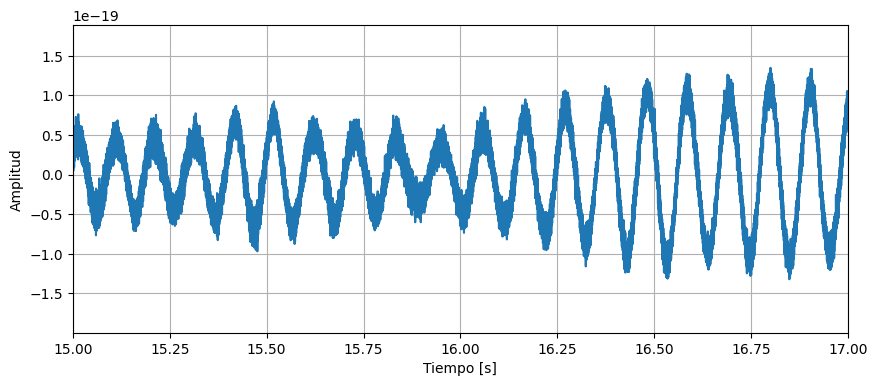

In [6]:
import matplotlib.pyplot as plt

f0 = 16000  # Por ejemplo, 100 Hz

t = np.arange(0, len(strain)/f0, 1/f0)

plt.figure(figsize=(10, 4))
plt.plot(t,strain)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.xlim(15,17)

## 2. Convertir en audio
Es una forma de validar que tenemos un alto componente de ruido en la señal y que el interés es eliminarlo para encontrar una señal candidata.

Te recomiendo hacer una señal de audio de cada uno de las etapas para así validar como va el proceso. Al final deberás obtener un señal con CHIRP o BUMP. Son sonidos que comprueban que tienes una cantidad de potencia que sobre destaca sobre el ruido.

In [9]:
from IPython.display import Audio

Audio(data=strain, rate=16000)

## 3. Análisis de Fourier
Al realizar la conversión, queremos ver cuales son las componentes de ruido que más afectan al instrumento y debemos ignorar en el análisis. Eso se ve como "pico" o la apariencia de "peine".
Se debe presenta la densidad espectral de potencia antes y después de la función de Windowing.


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(5, 7999.969482421875)

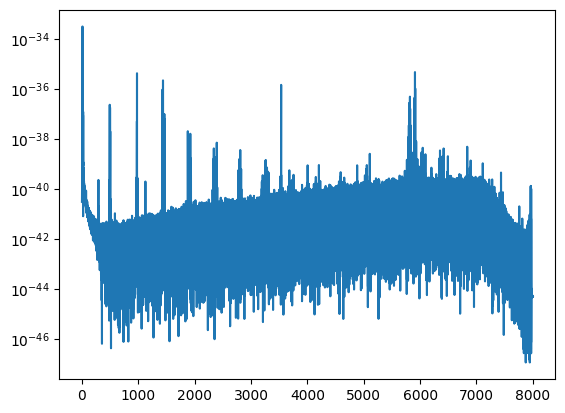

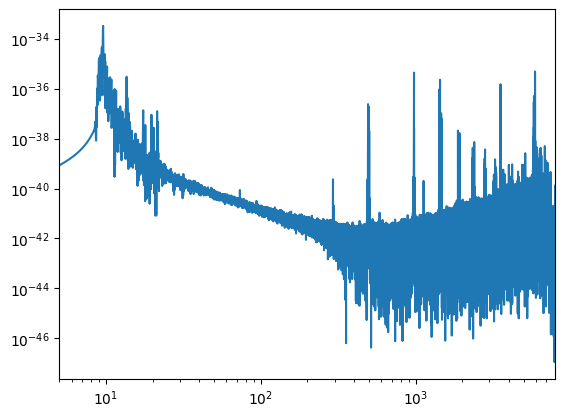

In [7]:
fs=16000
n= len(t)
señal_fft=np.fft.fft(strain,n)
psd=señal_fft*np.conj(señal_fft)/n
frec=(1/((1/fs)*n))*np.arange(n)
l=np.arange(1,np.floor(n/2),dtype='int')

plt.semilogy(frec[l],psd[l],label='señal con ruido')
#plt.xlim(frec[l[0]],frec[l[-1]])

plt.figure()
plt.loglog(frec[l],psd[l],label='señal con ruido')
plt.xlim(5,frec[l[-1]])


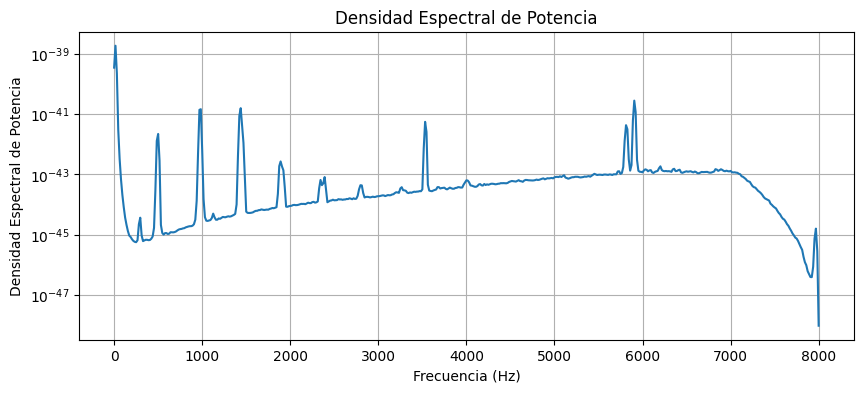

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.signal import tukey

fs = 16000  # Frecuencia de muestreo en Hz
frecuencias, psd1 = welch(strain, fs, window='hann' , nperseg=1024, scaling='spectrum')

# Graficar el PSD
plt.figure(figsize=(10, 4))
plt.semilogy(frecuencias, psd1)
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad Espectral de Potencia')
plt.grid(True)
plt.show()


## 4. Procesamiento
Debes inferir de tu estudio, cual es el proceso que aplican a la señal y reproducirlo. Es posible que cada estudiante llegue a una solución más o menos diferente, pues no hay un código abierto donde esté el procedimiento completo.


<ipython-input-10-319046d4d051>:8: DeprecationWarning: Importing tukey from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.tukey' or the convenience function 'scipy.signal.get_window' instead.
  ventana = tukey(len(strain[240000:260000]), alpha) # crea la ventana


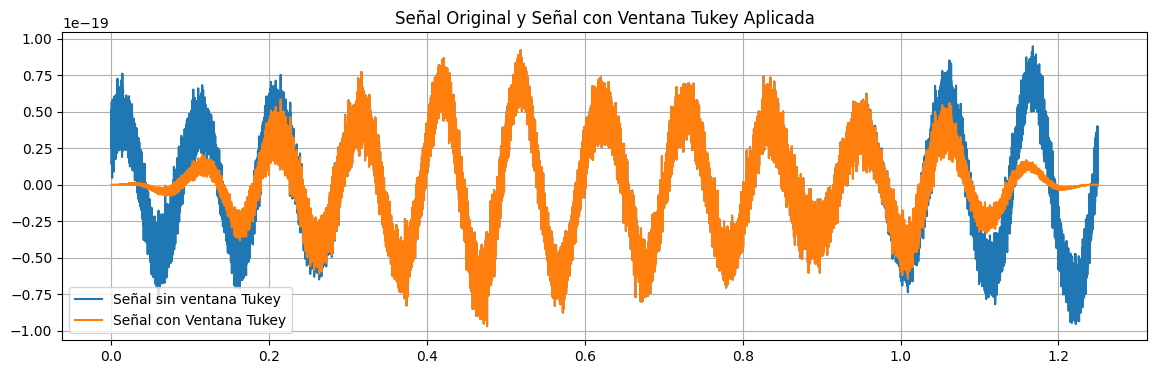

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tukey

fs = 16000  #frecuencia de muestreo en Hz
t = np.arange(0, len(strain[240000:260000])/fs, 1/fs)
alpha = 0.5  #ventana Tukey roll-off
ventana = tukey(len(strain[240000:260000]), alpha) # crea la ventana

señal_tukey = strain[240000:260000] * ventana #aplica ventana a la señal

plt.figure(figsize=(14, 4))
plt.plot(t, strain[240000:260000], label='Señal sin ventana Tukey')
plt.plot(t, señal_tukey, label='Señal con Ventana Tukey')
plt.title('Señal Original y Señal con Ventana Tukey Aplicada')
plt.legend()
plt.grid(True)
plt.show()
Audio(señal_tukey,rate=16000)

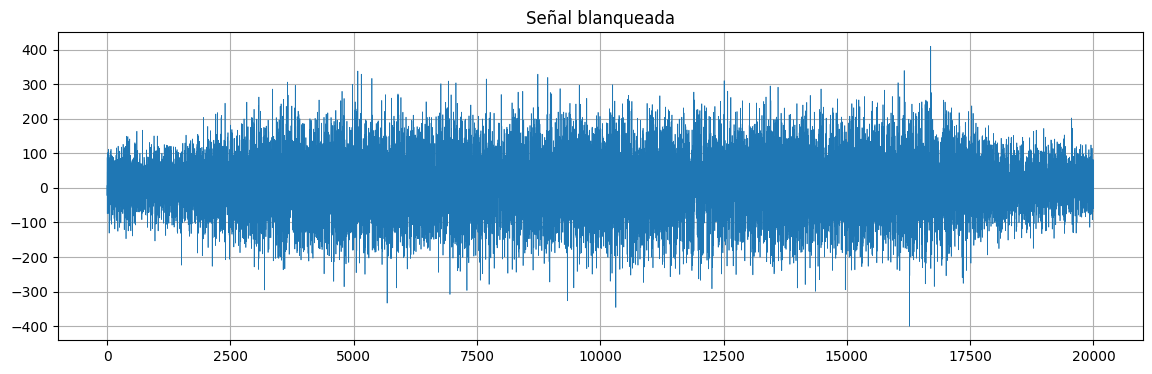

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import welch


# Calcula la PSD de la señal con la ventana Tukey
fs = 16000  # Frecuencia de muestreo
NFFT = len(señal_tukey)  # Número de puntos para el cálculo de la PSD
frecuencias, psd = welch(señal_tukey, fs=fs, window='tukey', nperseg=NFFT, scaling='spectrum')

# Interpola la PSD
psd_interp = interp1d(frecuencias, psd)

#blanqueado
whitening_factor = 1.0 / np.sqrt(psd_interp(frecuencias))
whitened_signal = np.fft.irfft(np.fft.rfft(señal_tukey) * whitening_factor)

plt.figure(figsize=(14, 4))
plt.plot(whitened_signal, alpha=1, linewidth=0.5)
plt.title('Señal blanqueada')
plt.grid(True)
plt.show()

# Reproducir la señal blanqueada (si deseas)
Audio(whitened_signal, rate=fs)


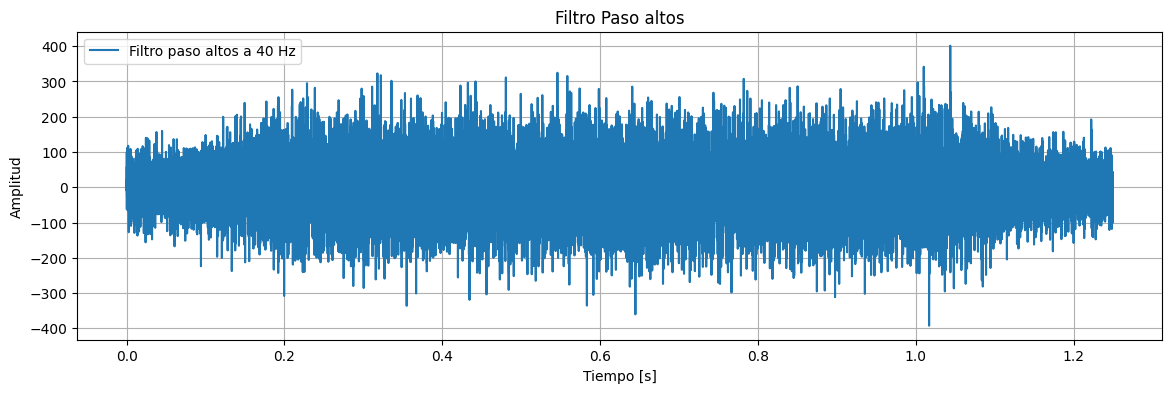

In [24]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

def butter_highpass(cutoff, fs, order=7): # crea filtro
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=7): #aplica filtro
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

f_corte = 40  # frecuencia de corte en Hz
señal_p_altos = highpass_filter(whitened_signal, f_corte, fs=16000)
t = np.arange(0, len(strain[240000:260000])/fs, 1/fs)

plt.figure(figsize=(14, 4))
plt.plot(t, señal_p_altos, label=f'Filtro paso altos a {f_corte} Hz')
plt.title('Filtro Paso altos')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

Audio(señal_p_altos,rate=16000)

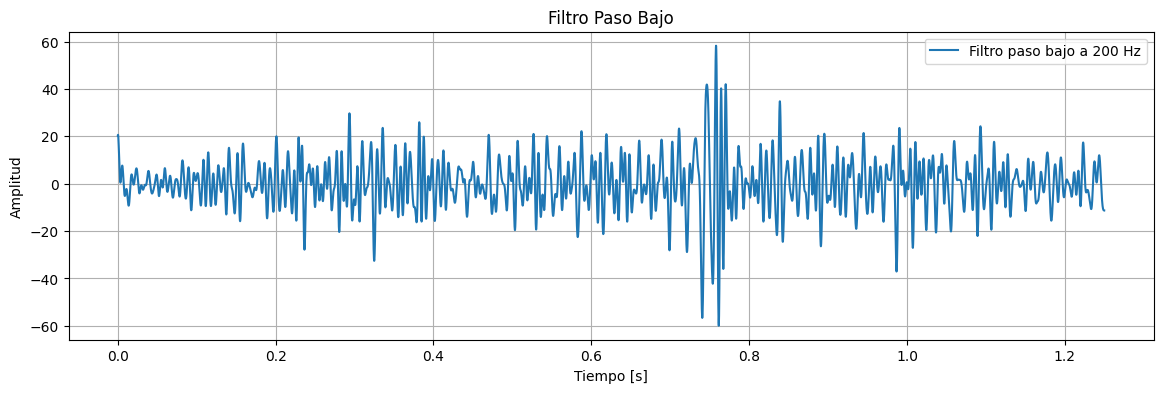

In [26]:
from scipy.signal import butter, filtfilt
import numpy as np
import matplotlib.pyplot as plt

def butter_pasabajos(cutoff, fs, order=7): # crea filtro
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def pasa_bajos(data, cutoff, fs, order=7): # aplica filtro
    b, a = butter_pasabajos(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y


f_corte = 200  # Frecuencia de corte del filtro pasa bajos en Hz
señal_p_bajos = pasa_bajos(señal_p_altos, f_corte, fs=16000)
t = np.arange(0, len(strain[240000:260000])/fs, 1/fs)

# Grafica la señal original y la señal filtrada
plt.figure(figsize=(14, 4))
plt.plot(t, señal_p_bajos, label=f'Filtro paso bajo a {f_corte} Hz')
plt.title('Filtro Paso Bajo')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()
Audio(señal_p_bajos,rate=16000)

# Resampling
Para lograr una mejor definición de la señal, se debe hacer un resampleo. Esto tienen consecuencias por eso debe elegirse bien la frecuencia de tal forma que no se introduzca ruido.

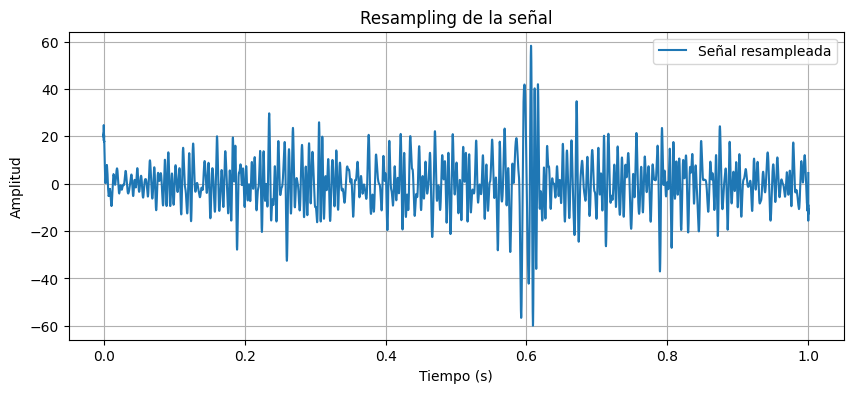

In [49]:
from scipy.signal import resample
import numpy as np
import matplotlib.pyplot as plt

fs_original = 16000  # Frecuencia de muestreo original (Hz)
fs_nuevo = 32000  # Nueva frecuencia de muestreo deseada (Hz)
factor_resampling = fs_nuevo / fs_original

cantidad_muestras_nuevo = int(len(señal_p_bajos) * factor_resampling)
signal_resampleada = resample(señal_p_bajos, cantidad_muestras_nuevo)

t_nuevo = np.linspace(0, 1, cantidad_muestras_nuevo, endpoint=False)

plt.figure(figsize=(10, 4))
plt.plot(t_nuevo, signal_resampleada, label='Señal resampleada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Resampling de la señal')
plt.legend()
plt.grid(True)
plt.show()
Audio(signal_resampleada,rate=32000)

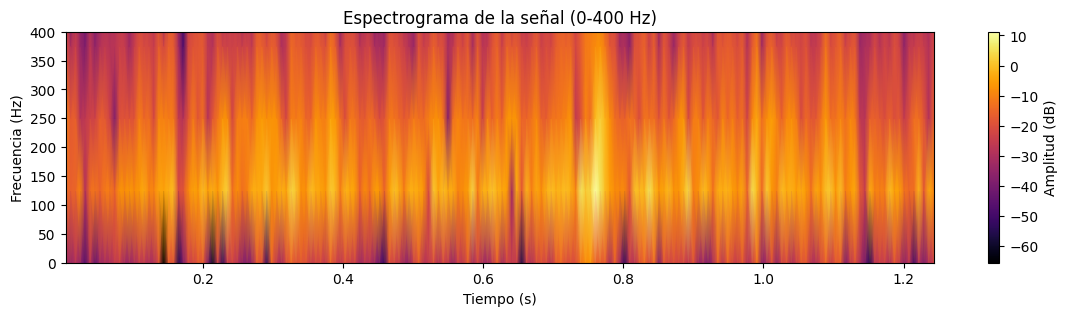

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 32000  # Frecuencia de muestreo (Hz)
frequencies, times, spectrogram = signal.spectrogram(signal_resampleada, fs)

indice_frecuencia_max = np.where(frequencies <= 500)[0][-1]  # Índice de la última frecuencia menor o igual a 400 Hz
frequencies = frequencies[:indice_frecuencia_max + 1]  # Limitar el rango de frecuencias
spectrogram = spectrogram[:indice_frecuencia_max + 1, :]  # Limitar el rango de frecuencias en el espectrograma

plt.figure(figsize=(14, 3))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='gouraud', cmap='inferno')
plt.colorbar(label='Amplitud (dB)')
plt.ylabel('Frecuencia (Hz)')
plt.xlabel('Tiempo (s)')
plt.title('Espectrograma de la señal (0-400 Hz)')
plt.ylim(0, 400)
plt.show()
